In [3]:
using DataFrames, XLSX, StatsPlots, CSV, Statistics

# an overview of the US international trade

### us trade balance with china

In [7]:
wb = XLSX.readxlsx("data\\us_trade_country.xlsx")
sheet1 = wb1["Table 3"]
year, bal = sheet1["A9:A31"][:, 1], sheet1["D9:D31"][:, 1]  # transform matrix to array
bal = bal / 1000  # transform to billion
len = length(bal)
cum_bal = zeros(len)
for i = 1:len
    if i == 1
        cum_bal[i] = bal[i]
    else
        cum_bal[i] = cum_bal[i-1] + bal[i]
    end
end

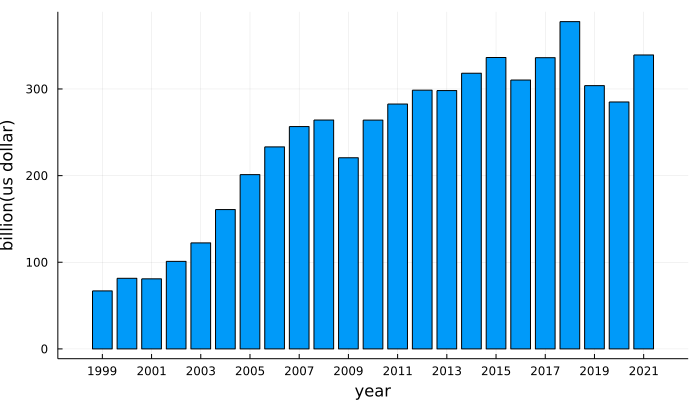

In [8]:
bar(year,-bal, xticks=1999:2:2021, xlabel="year", ylabel="billion(us dollar)", label="", size=(700, 400))
#png("picture\\us_trade_account_deficit_by_china")

### cumulative

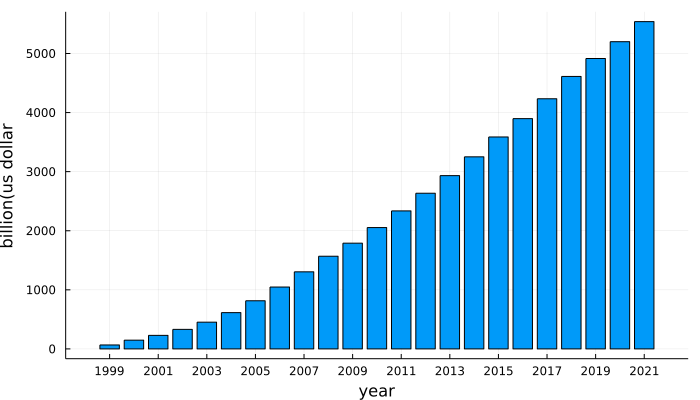

In [9]:
bar(year1, -cum_bal, xticks=1999:2:2021, xlabel="year", ylabel="billion(us dollar", label="", size=(700, 400))
#png("picture\\cumulatvive_us_trade_account_deficit_by_china")

### with other countries

In [10]:
brazil = sheet1["B9:B31"][:, 1] / 1000
canada = sheet1["C9:C31"][:, 1] / 1000
france = sheet1["E9:E31"][:, 1] / 1000
germany = sheet1["F9:F31"][:, 1] /1000
hongkong = sheet1["G9:G31"][:, 1] / 1000
india = sheet1["H9:H31"][:, 1] / 1000
italy = sheet1["I9:I31"][:, 1] / 1000
japan = sheet1["J9:J31"][:, 1] / 1000
southkorean = sheet1["K9:K31"][:, 1] / 1000
mexico = sheet1["L9:L31"][:, 1] / 1000
saudiarabia = sheet1["M9:M31"][:, 1] / 1000
singapore = sheet1["N9:N31"][:, 1] / 1000
taiwan = sheet1["O9:O31"][:, 1] / 1000
uk = sheet1["P9:P31"][:, 1] / 1000
other = sheet1["Q9:Q31"][:, 1] / 1000;

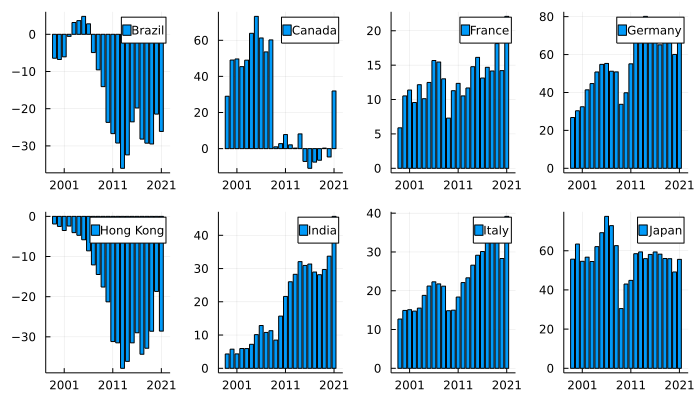

In [12]:
p1 = bar(year1, -brazil, label="Brazil")
p2 = bar(year1, -canada, label="Canada")
p3 = bar(year1, -france, label="France")
p4 = bar(year1, -germany, label="Germany")
p5 = bar(year1, -hongkong, label="Hong Kong")
p6 = bar(year1, -india, label="India")
p7 = bar(year1, -italy, label="Italy")
p8 = bar(year1, -japan, label="Japan")
plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(2,4), xticks=1991:10:2021, size=(700, 400))
#png("picture\\us_trade_overview1")

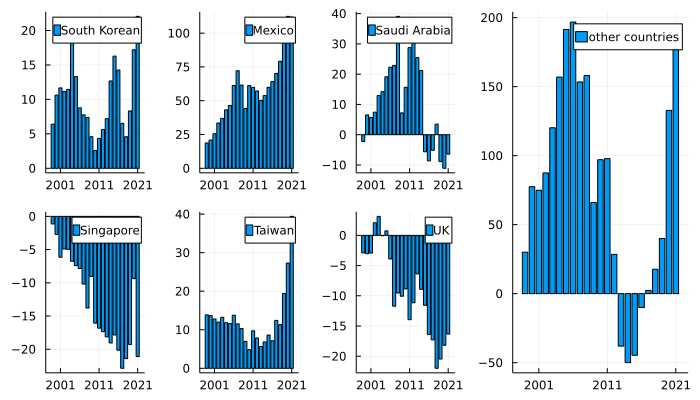

In [13]:
p1 = bar(year1, -southkorean, label="South Korean")
p2 = bar(year1, -mexico, label="Mexico")
p3 = bar(year1, -saudiarabia, label="Saudi Arabia")
p4 = bar(year1, -singapore, label="Singapore")
p5 = bar(year1, -taiwan, label="Taiwan")
p6 = bar(year1, -uk, label="UK")
p7 = bar(year1, -other, label="other countries")
l = @layout [
    [grid(2,3)] a{0.3w}
]
plot(p1, p2, p3, p4, p5, p6, p7, layout=l, xticks=1991:10:2021, size=(700, 400))
#png("picture\\us_trade_overview2")

# chinese US dollar flow

### treasure bond

In [16]:
wb = XLSX.readxlsx("data/us_long_term_security_china.xlsx")
sheet_pur = wb["purchase"]
df_pur = DataFrame(sheet_pur["A2:G277"], :auto)
rename!(df_pur, 1=>"year", 2=>"us_treasury_bonds_notes_p", 3=>"us_gov_agency_bonds_p", 4=>"us_corp_bonds_p", 5=>"us_corp_stocks_p",
        6=>"foreign_bonds_p", 7=>"foreign_stocks_p")  # the ! means inplace
sheet_sell = wb["sell"]
df_sell = DataFrame(sheet_sell["A2:G277"], :auto)
rename!(df_sell, 1=>"year", 2=>"us_treasury_bonds_notes_s", 3=>"us_gov_agency_bonds_s", 4=>"us_corp_bonds_s", 5=>"us_corp_stocks_s",
        6=>"foreign_bonds_s", 7=>"foreign_stocks_s")  # the ! means inplace

# merge the two bonds
df2 = innerjoin(df_pur, df_sell, on=:year);

In [18]:
new_frame = []
for i = 2:13
    t = 1
    new_data = zeros(23)
    for j in 1:23
        year_data = mean(df2[:, i][t:t+11])
        new_data[j] = year_data 
        t = t + 12
    end
    push!(new_frame, new_data)
end

reverse_year = reverse(year)
df3 = DataFrame(year = reverse_year, us_treasury_bonds_notes_p=new_frame[1], us_gov_agency_bonds_p=new_frame[2], us_corp_bonds_p=new_frame[3],
                 us_corp_stocks_p=new_frame[4], foreign_bonds_p=new_frame[5], foreign_stocks_p=new_frame[6],
                 us_treasury_bonds_notes_s=new_frame[7], us_gov_agency_bonds_s=new_frame[8], us_corp_bonds_s=new_frame[9],
                 us_corp_stocks_s=new_frame[10], foreign_bonds_s=new_frame[11], foreign_stocks_s=new_frame[12])

sort!(df3, :year);

df3.:us_treasury_bonds_notes_n = df3.:us_treasury_bonds_notes_p - df3.:us_treasury_bonds_notes_s
df3.:us_gov_agency_bonds_n = df3.:us_gov_agency_bonds_p - df3.:us_gov_agency_bonds_s
df3.:us_corp_bonds_n = df3.:us_corp_bonds_p - df3.:us_corp_bonds_s
df3.:us_corp_stocks_n = df3.:us_corp_stocks_p - df3.:us_corp_stocks_s

df3.:net_security_purchase = df3.:us_treasury_bonds_notes_n + df3.:us_gov_agency_bonds_n + df3.:us_corp_bonds_n + df3.:us_corp_stocks_n;


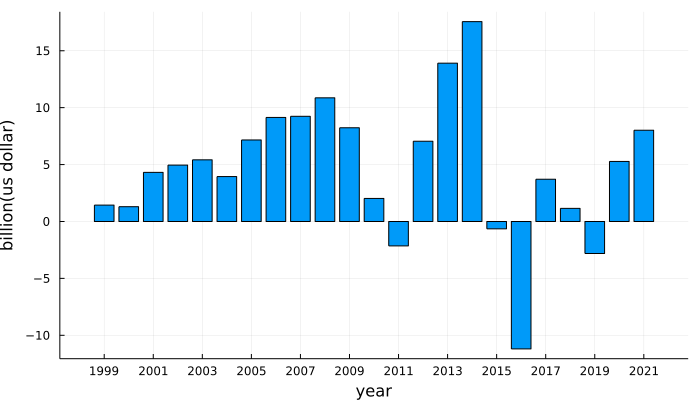

In [20]:
bar(df3.:year, df3.:net_security_purchase, xticks=1999:2:2021, xlabel="year", ylabel="billion(us dollar)", label="", size=(700, 400))
#png("picture/china__long_term_security_us")

### china financial account deficit

In [83]:
wb = XLSX.readxlsx("data\\china_financial_account_deficit.xlsx")
sheet = wb["01"]
df = DataFrame(sheet["A20:B43"], :auto)  # transform the matrix to dataframe should assign the second argument :auto
rename!(df, 1=>"year", 2=>"deficit_amount");  # the ! means inplace

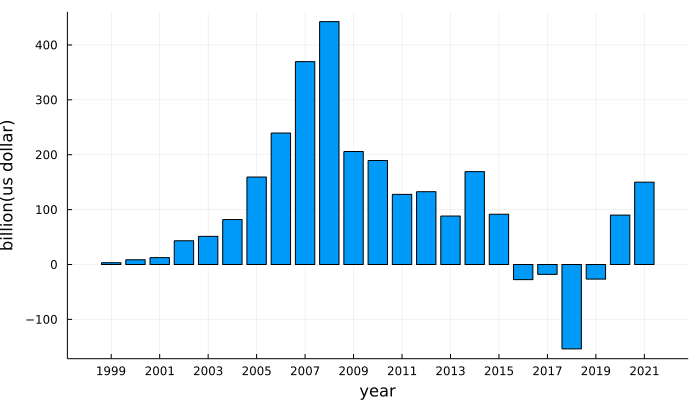

In [146]:
bar(df.:year[2:end], df.:deficit_amount[2:end], xticks=1999:2:2021, xlabel="year", ylabel="billion(us dollar)", label="", size=(700, 400))
#png("picture\\china_financial_account_deficit.png")

### foreign exchange reserve

In [40]:
wb_reserve = XLSX.readxlsx("data/china_foreign_exchange_reserve.xlsx")
sheet_reserve = wb_reserve["01"]
reserve_data = sheet_reserve["A2:B25"]
reserve = reserve_data[:, 2]
len = length(reserve) - 1
reserve_growth = zeros(len)
for i = 1:len
    reserve_growth[i] = reserve[i+1] - reserve[i]
end

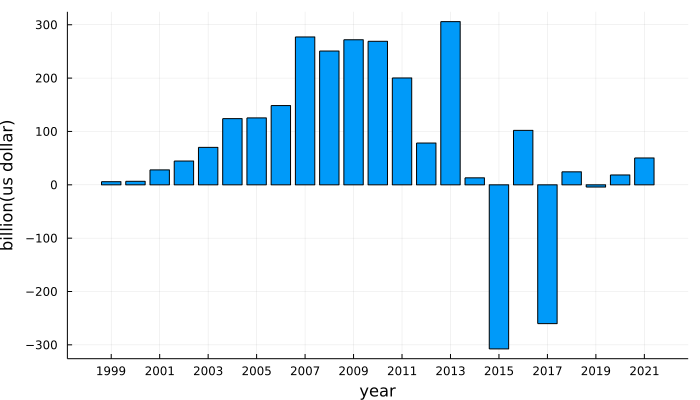

In [41]:
bar(reserve_data[2:end, 1], 0.6 .* reserve_growth, xticks=1999:2:2021, label="", xlabel="year",
    ylabel="billion(us dollar)", size=(700, 400))
#png("picture\\china_foreign_exchange_reserve_growth")

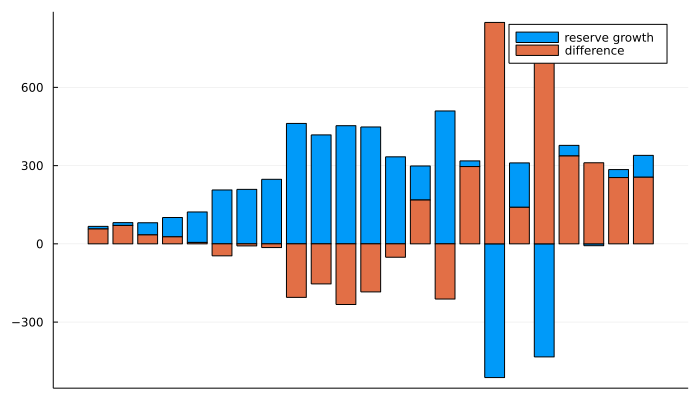

In [56]:
difference = -bal - reserve_growth
cumulative_difference = zeros(23)
cumulative_difference[1] = difference[1]
for i = 2:23
    cumulative_difference[i] = difference[i] + cumulative_difference[i-1]
end
groupedbar([reserve_growth difference], bar_position=:stack, xticks=1998:2:2021, label=["reserve growth" "difference"], size=(700, 400))
#png("picture/net_flow_out")


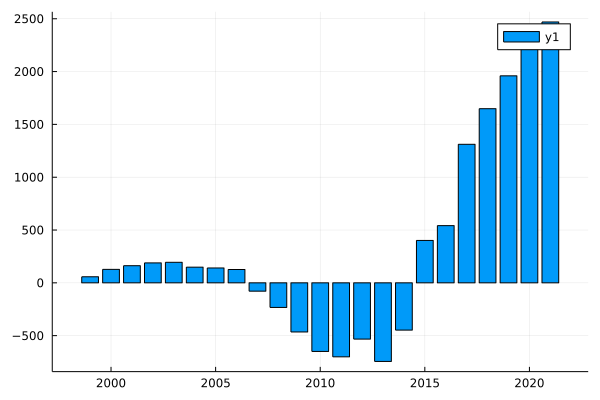

In [47]:
bar(year, cumulative_difference)

# inspectation

In [ ]:
wb = XLSX.readxlsx("data/CNY_USD.xlsx")
sheet2 = wb2["01"]
data = sheet2["B2:B24"]
cny_usd = data[:, 1]
usd_cny = 1 ./ cny_usd;

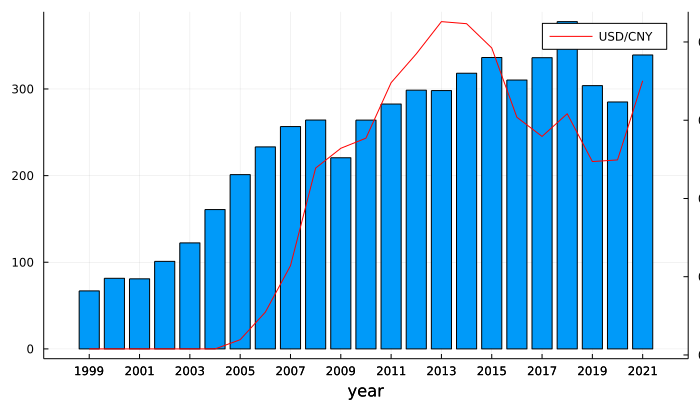

In [ ]:
bar(year, -bal, xticks=1999:2:2021, xlabel="year", ylabel="", label="")
subplot = twinx()
plot!(subplot, year, usd_cny, xticks=1999:2:2021, xlabel="year", label="USD/CNY", c=:red, size=(700, 400))

# comparison to Taiwan

In [57]:
wb = XLSX.readxlsx("data/NTW_USD.xlsx")
sheet3 = wb["01"]
ntw_usd_monthly = sheet3["F1:F288"][:, 1]
len = 24  # 1998-2021: 24 years
ntw_usd_yearly = zeros(24)
y = 1
for i = 1:24
    ntw_usd_yearly[i] = mean(data_ntw_usd_monthly[y:y+11])
    y += 12
end
reverse!(ntw_usd_yearly)

ntw_usd_yearly = ntw_usd_yearly .* 100;

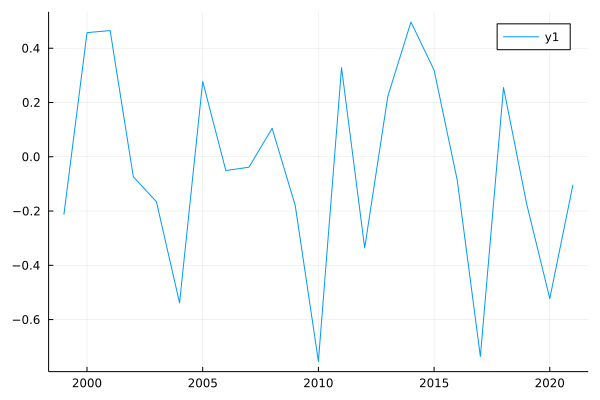

In [58]:
plot(year, ntw_usd_yearly[2:end])